<a href="https://colab.research.google.com/github/Sam-krish2411/DATA-SCIENCE-ASSIGNMENT/blob/main/LOGISTIC_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATA EXPLORATION - EDA PROCESS**

In [ ]:
#DATA EXPLORATION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#LOADING THE DATASET
df = pd.read_csv("Titanic.csv")

#OVERVIEW OF THE DATASET
print("Dataset Shape:", df.shape)
print("\nPreview of Data:")
(df.head())

print("\nInfo about dataset:")
print(df.info())


print("\nMissing values per column:")
print(df.isnull().sum())

Dataset Shape: (891, 12)

Preview of Data:

Info about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch         

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#SUMMARY STATISTICS
(df.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#FEATURE TYPES
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

numeric_cols


['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
categorical_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [ ]:
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
#DROPPING COLUMNS
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Verify it's gone
print(df.columns)

#REASON - The columns PassengerId, Name, Ticket, and Cabin were dropped from the dataset since they are either identifiers or contain excessive missing values, and therefore do not provide meaningful predictive power for the survival outcome.



Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [ ]:
print(df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


#**DATA PREPROCESSING**

**1. HANDLING MISSING VALUES IN THE DATASET** / **IMPUTATION**

The missing values in the **Age column** were imputed using the **median** because Age is a numerical variable and the median is less sensitive to outliers compared to the mean, ensuring a more robust central estimate. The missing values in the **Embarked column** were imputed using the **mode**, since Embarked is a categorical variable and replacing missing values with the most frequent category preserves the distribution of embarkation points.

In [ ]:
#HANDLIING MISSING VALUES

#AGE COLUMN
df['Age'].fillna(df['Age'].median(), inplace=True)

#EMBARKED COLUMN
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)





/tmp/ipython-input-949176951.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-949176951.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
print(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


**2. CONVERTING THE DATA TYPES IN THE DATASET**

**SEX COLUMN**

The Sex column was converted from categorical text values (“male” and “female”) into numerical form using binary encoding, where male = 0 and female = 1, to make the data suitable for machine learning models.

**AGE COLUMN**

The Age column was converted from float to integer type since age is a whole number by nature, and representing it as an integer makes the dataset cleaner without losing any meaningful information.

**FARE COLUMN**

The Fare column was converted from float to integer type to simplify the representation of ticket fares. Although fares can include decimal values, rounding them to integers makes the dataset cleaner and reduces complexity without significantly affecting the predictive power.

**EMBARKED COLUMN**

The Embarked column was converted from categorical values (“S”, “C”, and “Q”) into numerical labels (0, 1, 2 respectively), enabling the data to be processed effectively by machine learning models.

In [ ]:
#SEX COLUMN
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).astype(int)

#AGE COLUMN
df['Age'] = df['Age'].astype(int)

#FARE COLUMN
df['Fare'] = df['Fare'].astype(int)

#EMBARKED COLUMN
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   Age       891 non-null    int64
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
 6   Fare      891 non-null    int64
 7   Embarked  891 non-null    int64
dtypes: int64(8)
memory usage: 55.8 KB


#**VISUALISATIONS**

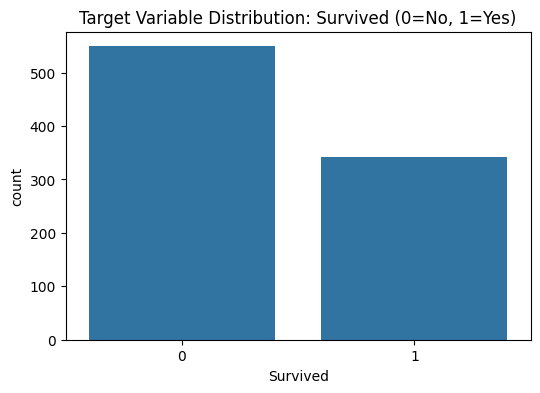

<Figure size 640x480 with 0 Axes>

In [ ]:
#TARGET VARIABLE VISUALISATION
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df)
plt.title("Target Variable Distribution: Survived (0=No, 1=Yes)")
plt.show()

#df[numeric_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Histograms of Numeric Variables")
plt.show()

# Interpretation:
# - Age is right-skewed with many young adults.
# - Fare is highly skewed with few very high values.
# - SibSp and Parch mostly concentrated at 0 → most passengers traveled alone.
#Interpretation:
# Around 38% survived and 62% did not. This shows class imbalance (more deaths than survivors).


In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

numeric_cols

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [ ]:
categorical_cols

[]

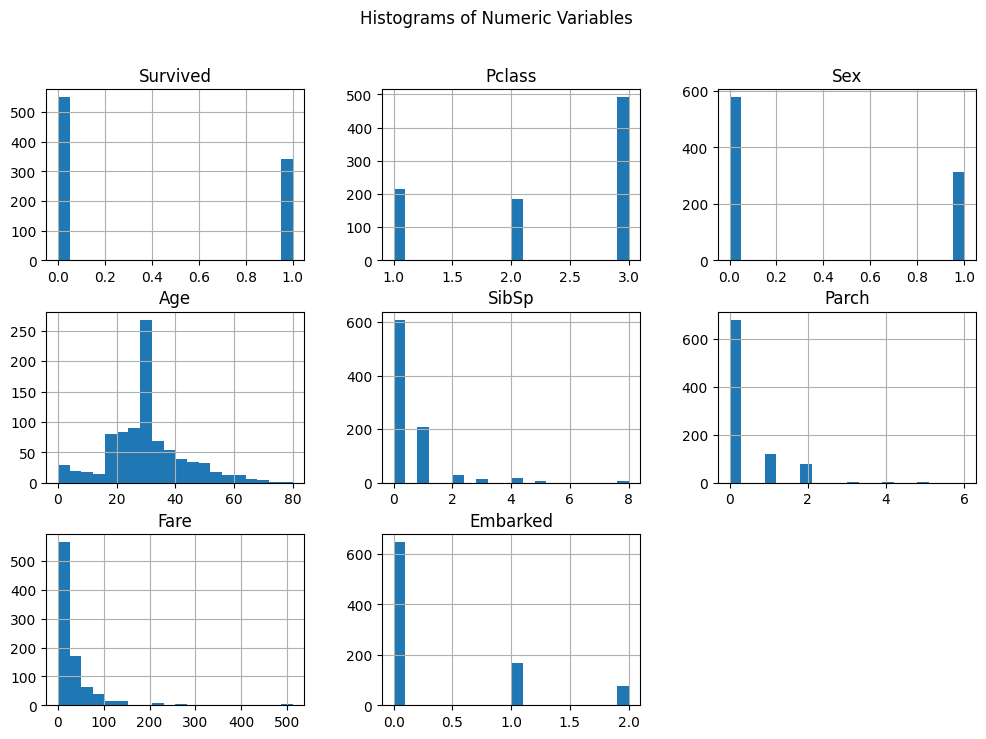

In [ ]:
#HISTOGRAM FOR NUMERICAL COLUMNS
df[numeric_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Histograms of Numeric Variables")
plt.show()

# Interpretation:
# - Age is right-skewed with many young adults.
# - Fare is highly skewed with few very high values.
# - SibSp and Parch mostly concentrated at 0 → most passengers traveled alone.


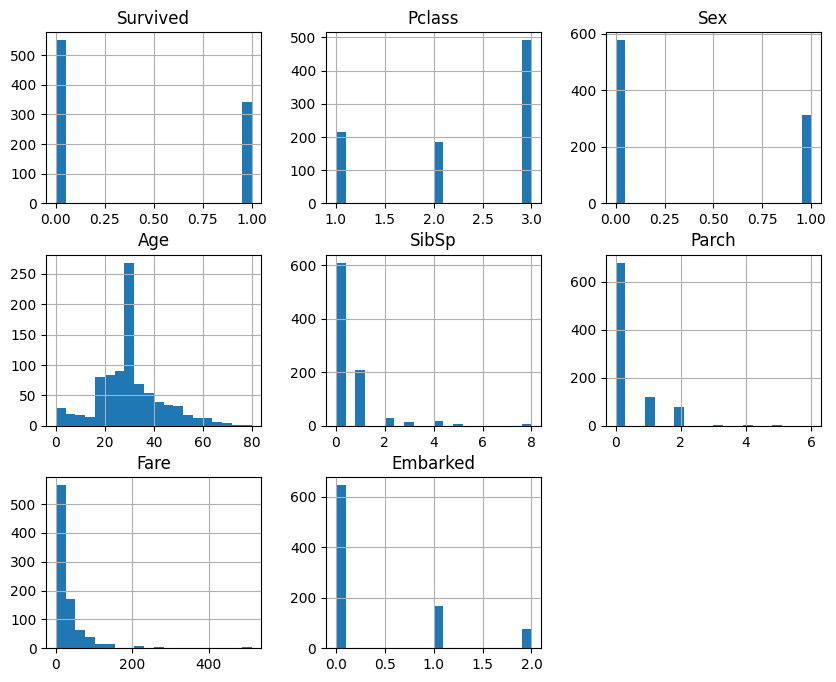

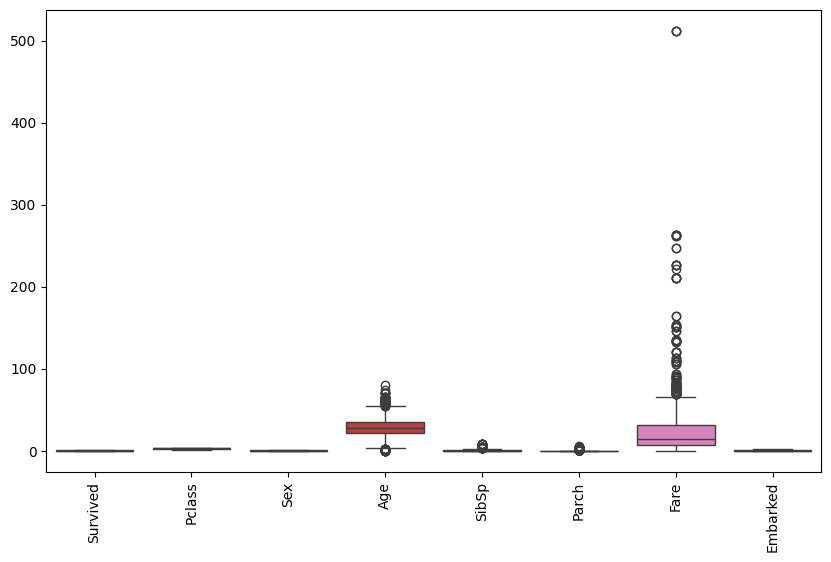

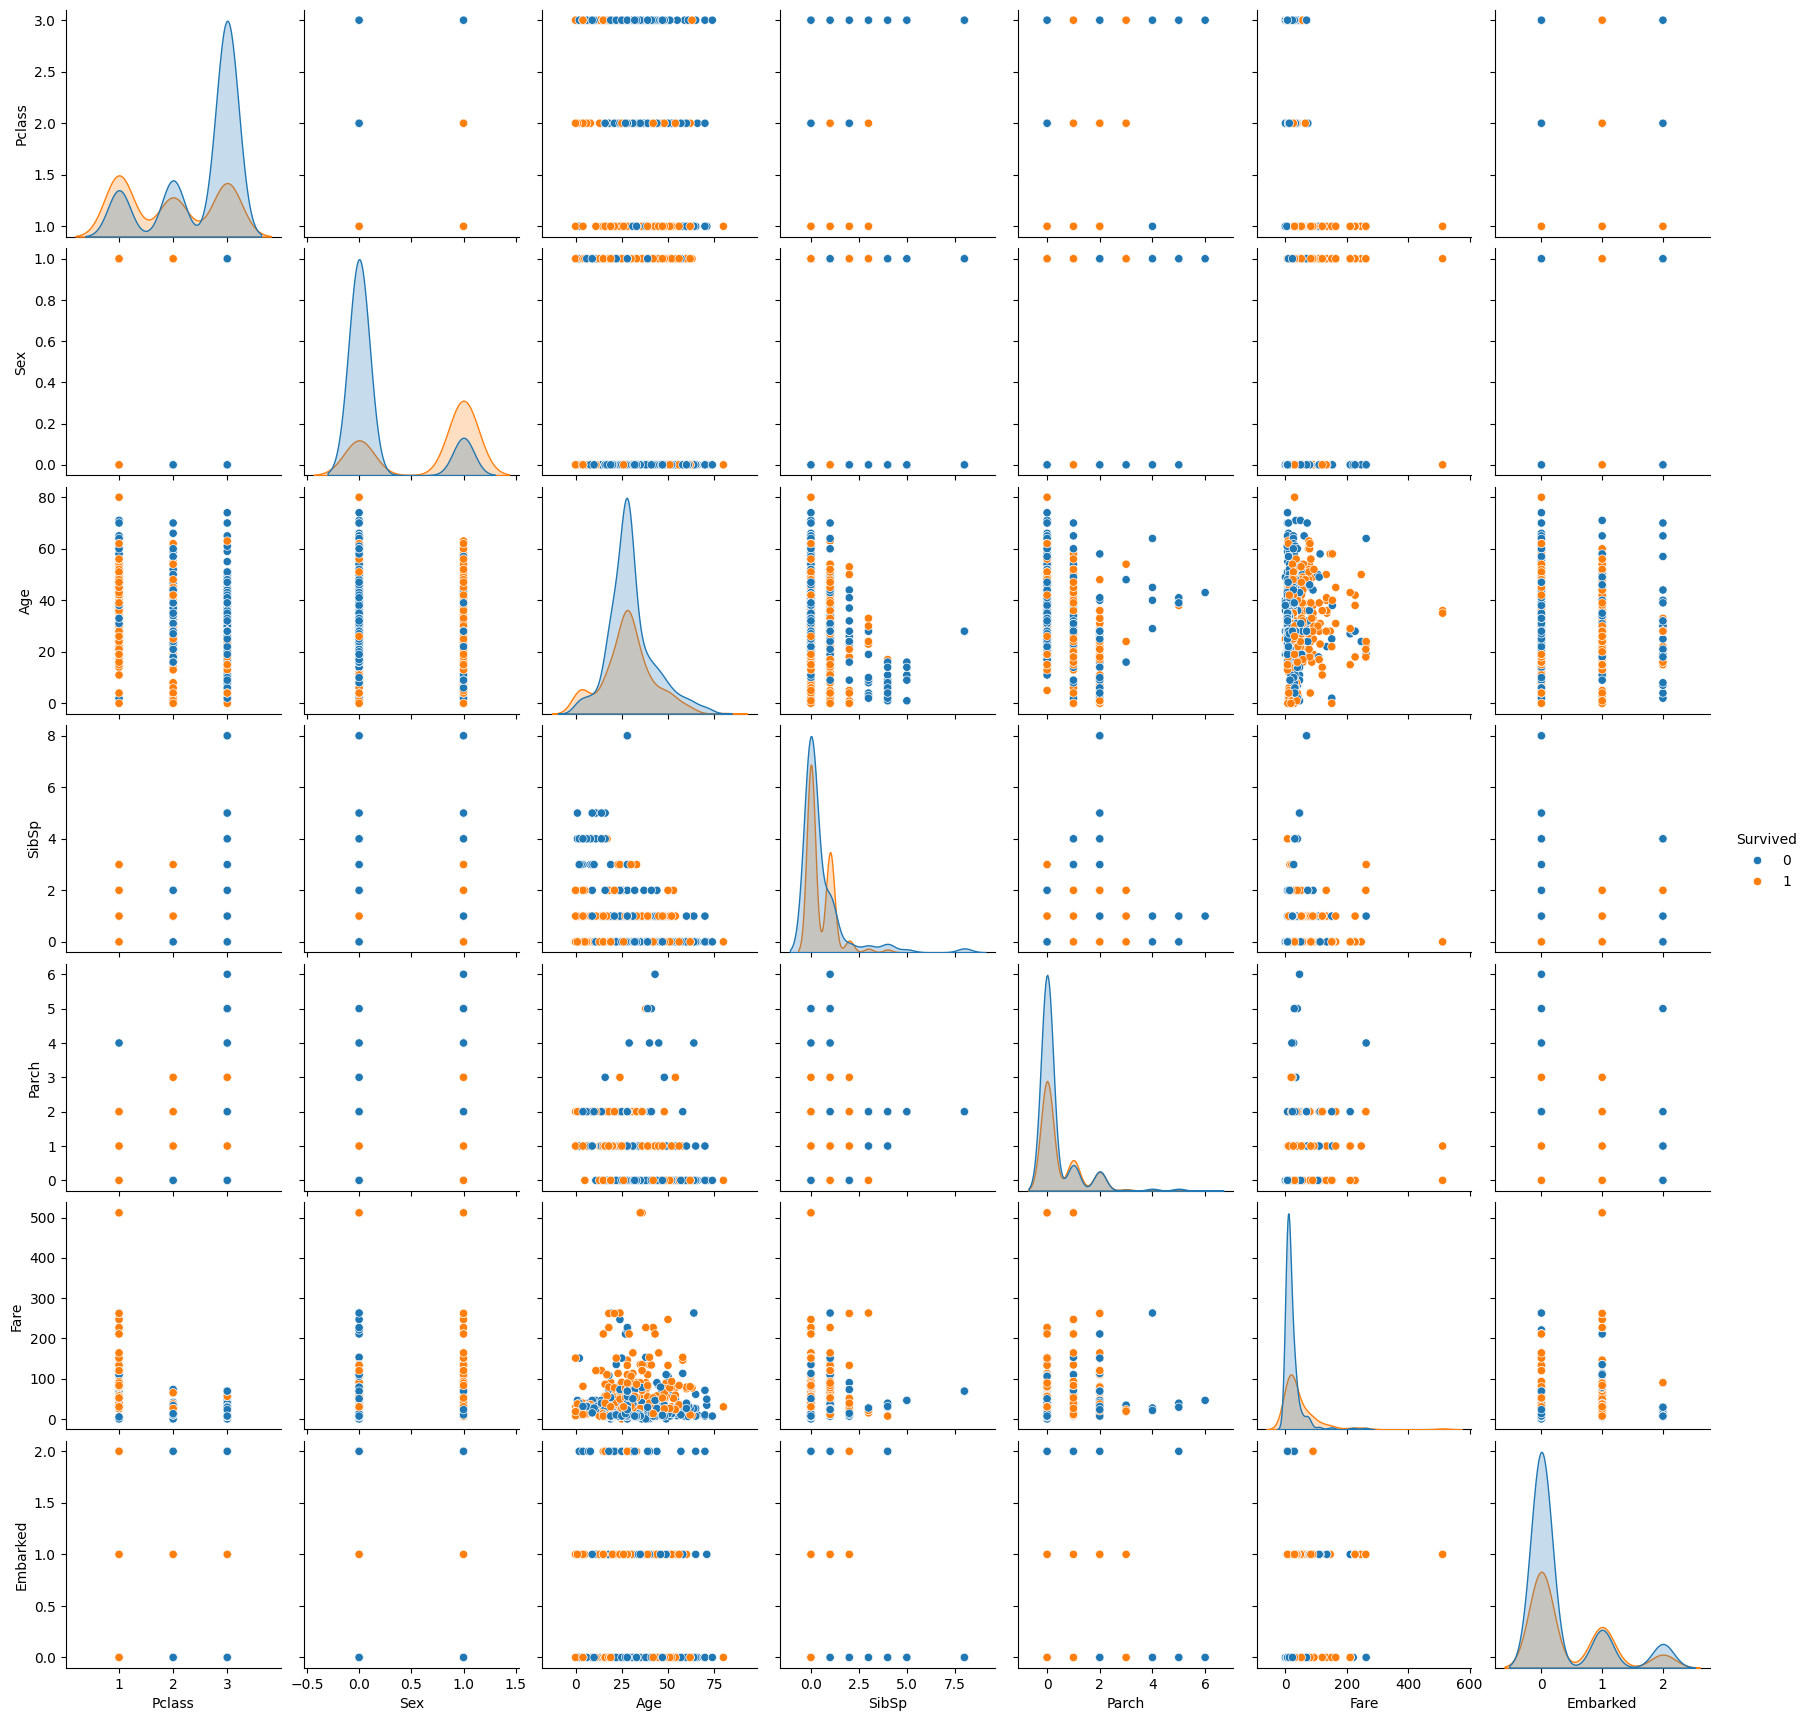

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(bins=20, figsize=(10,8))
plt.show()

# Boxplots
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Pairplots
sns.pairplot(df, hue="Survived")  # replace 'target' with your dependent variable
plt.show()

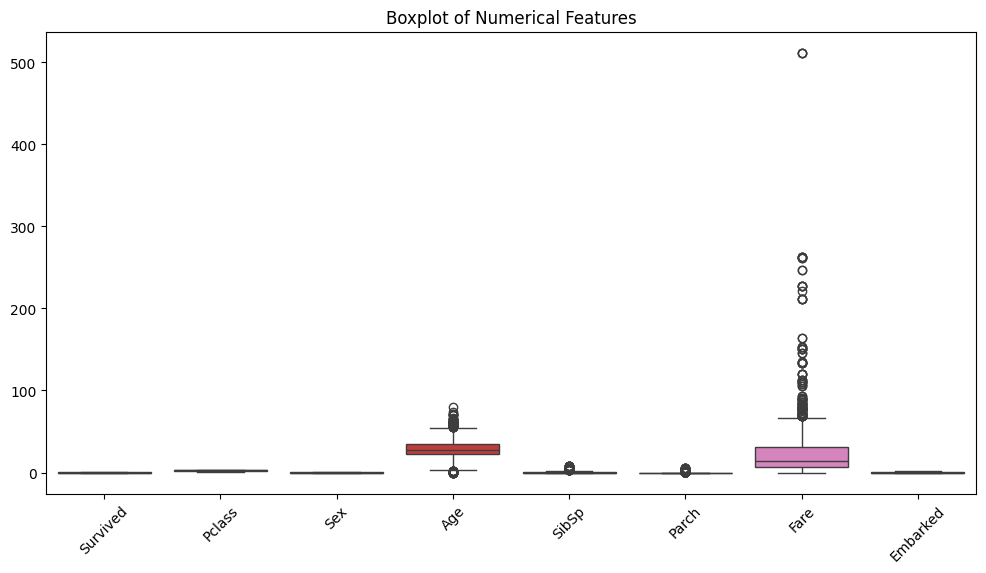

In [ ]:
#BOXPLOTS TO DETECT OUTLIERS
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

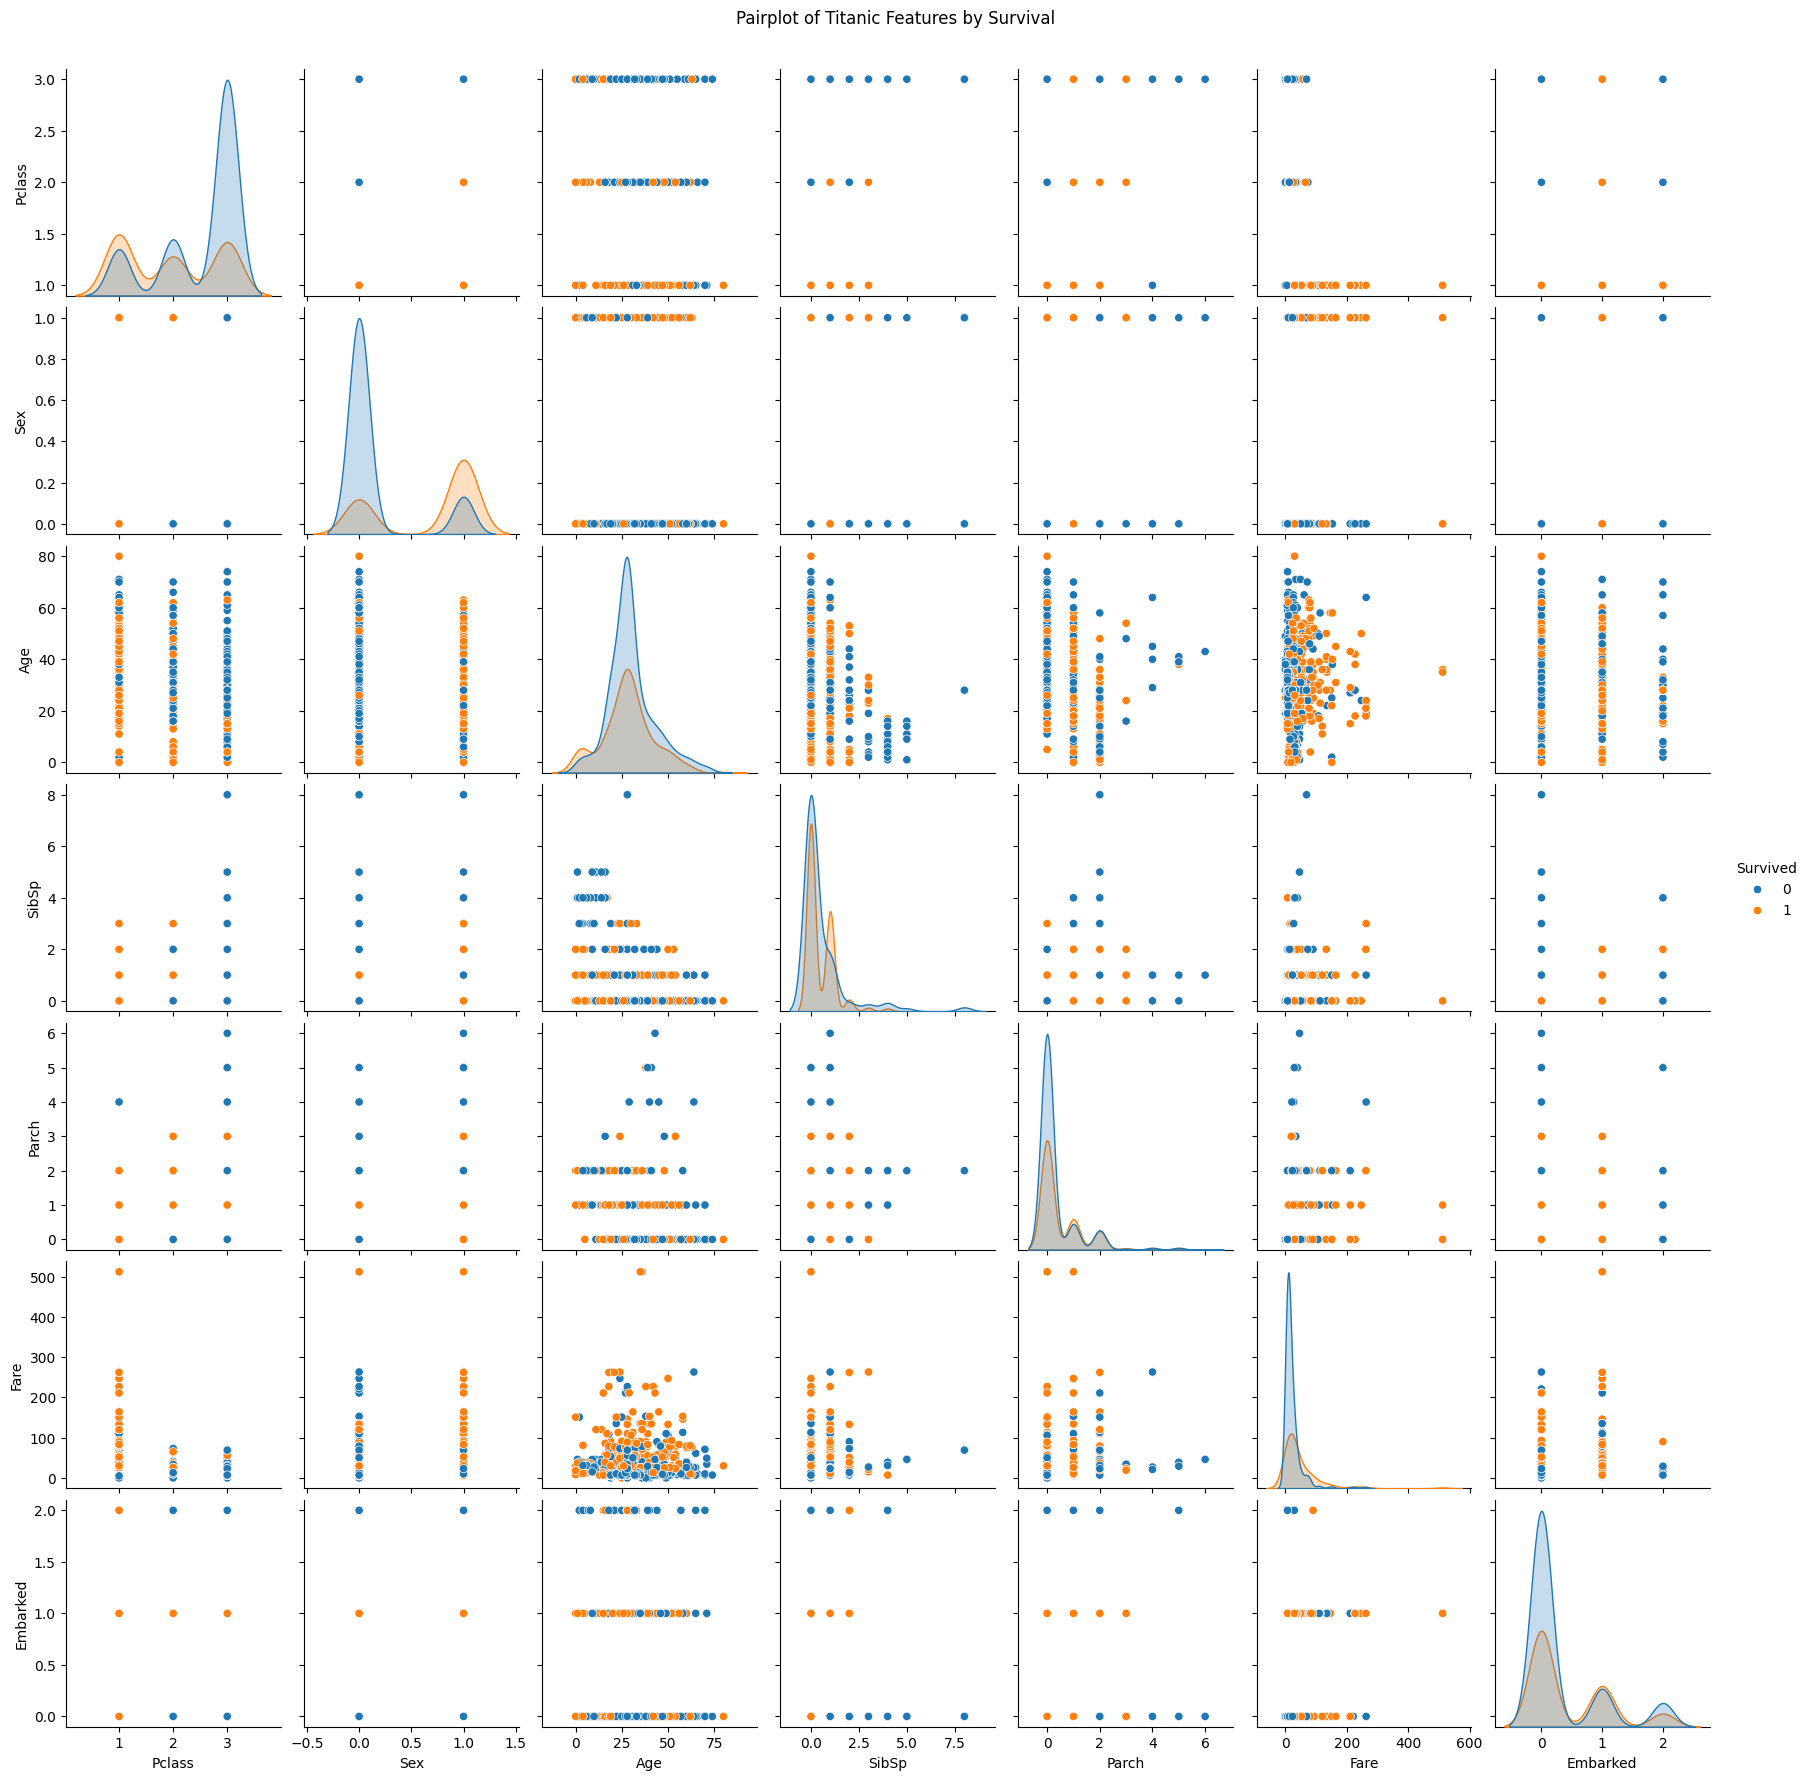

In [ ]:
#PAIRPLOTS FOR FEATURE RELATIONSHIPS
sns.pairplot(df, hue="Survived")  # Survived = target column
plt.suptitle("Pairplot of Titanic Features by Survival", y=1.02)
plt.show()

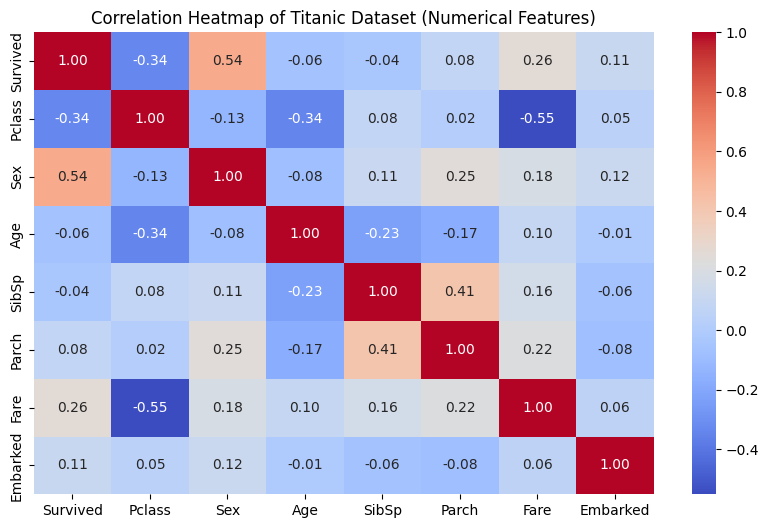

In [ ]:
#CORRELATION HEATMAP
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Titanic Dataset (Numerical Features)")
plt.show()

#**INTERPRETATIONS OF THE VISULAISATIONS ABOVE**


**1.CORRELATION HEATMAP**
 - The correlation heatmap shows how strongly the numerical features are related to one another and to the target variable Survived.

Key Insights:

- Sex has a strong negative correlation with Survived, meaning males (0) were less likely to survive, while females (1) had higher survival chances.

- Fare has a positive correlation with Survived, indicating passengers who paid higher fares (often first-class) were more likely to survive.

- Pclass has a negative correlation with Survived, showing that lower-class passengers had a lower chance of survival.

- Other correlations (like Age, SibSp, Parch) with Survived are weaker, but still provide some predictive power.

**2. HISTOGRAMS**

- Histograms display the distribution of values in each numerical column.

Key Insights:

- Age: Most passengers were in their 20s and 30s, with fewer elderly passengers. Survival rates tend to be higher among children (younger ages).

- Fare: The majority of fares are low (indicating many third-class passengers), but there are a few very high fares (wealthy first-class passengers).

- Pclass: A large portion of passengers traveled in 3rd class, fewer in 1st and 2nd class. Survival is higher in 1st class.

- SibSp & Parch: Most passengers traveled alone (0 siblings/spouses and 0 parents/children), but those with small families had slightly better survival chances.

- Survived: The dataset is imbalanced, with more passengers not surviving than surviving.

**3. BOXPLOTS**

- Boxplots highlight the spread and outliers in the dataset.

Key Insights:

- Fare: Shows several extreme outliers (very high fares paid by wealthy passengers). These high-fare passengers also had better chances of survival.

- Age: Distribution is fairly even, but with a few very old passengers acting as outliers.

- Pclass, SibSp, and Parch: Show clustering near lower values, with a few outliers for large families.

**4. PAIRPLOT**

- The pairplot visualizes relationships between pairs of features, separated by survival (Survived).

Key Insights:

- Pclass vs Fare: Survivors are mostly concentrated in lower-class numbers (1st class) and higher fares, while non-survivors dominate in 3rd class with lower fares.

- Age vs Survived: Children (lower ages) had a higher chance of survival compared to adults.

- Sex vs Survived: Females (1) are visibly clustered among survivors, confirming gender played a major role in survival chances.

- Family Features (SibSp, Parch): Passengers with small family sizes had slightly higher survival, while those traveling alone or with very large families had lower chances.


**OVERALL CONCLUSION:**

The visualizations confirm that Sex, Pclass, and Fare are the strongest predictors of survival. Women, children, and first-class passengers with higher fares were more likely to survive, while men, third-class passengers, and those who traveled alone had lower survival chances.

#**MODEL BUILDING - LOGISTIC REGRESSION MODEL**

In [ ]:
#Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
#Define features (X) and target (y)
X = df.drop('Survived', axis=1)   # all independent variables
y = df['Survived']                # target variable

In [ ]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # increase iterations to ensure convergence
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
#Make predictions
y_pred = logreg.predict(X_test)


In [ ]:
#Evaluate model
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy Score: 0.8044692737430168

✅ Confusion Matrix:
 [[98 12]
 [23 46]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



#**INTERPRETATIONS**

**Accuracy Score = 0.804 (80.4%)**

- This means that the model correctly predicts survival for about 80% of passengers in the test dataset.

- While accuracy is good overall, it does not always tell the full story, especially when the classes (Survived vs. Not Survived) are imbalanced.

**CONFUSION MATRIX**


- True Negatives (98):
98 passengers who actually did not survive were correctly predicted as not surviving. Model is strong at predicting non-survivors.

- True Positives (46): 46 passengers who survived were correctly predicted. Model is also able to detect survivors, though not as strongly as non-survivors.

- False Positives (12):
12 passengers were incorrectly predicted as “Survived” when they actually didn't. This means the model sometimes overestimates survival chances.

- False Negatives (23):
23 passengers who actually survived were predicted as “Not Survived.” This is more serious in real-world scenarios, because missing a survivor (false negative) could be costlier than mistakenly predicting survival.


**Balanced Understanding:**

**A. Class 0 (Not Survived):**

- Precision: 0.81 → When the model predicts “Not Survived,” it is correct 81% of the time.

- Recall: 0.89 → The model identifies 89% of actual non-survivors.

**B. Class 1 (Survived):**

- Precision: 0.79 → When the model predicts “Survived,” it is correct 79% of the time.

- Recall: 0.67 → It only detects 67% of actual survivors, meaning it misses about 1 in 3 survivors.

**Conclusion**

- The model is better at predicting who did not survive (Class 0) than who survived (Class 1).

- Overall accuracy (80.4%) is good, but recall for survivors is weaker (67%), which means the model tends to under-predict survival.

- In Titanic analysis terms - the model is more confident in saying who died, but less reliable in identifying who survived.

**CLASSIFICATION REPORT**

**CLASS 0 - NOT SURVIVED**

Precision = 0.81
- Out of all passengers predicted as Not Survived, 81% were actually correct The model is pretty reliable when it predicts “Not Survived.”

Recall = 0.89
- Out of all actual Not Survived passengers, 89% were correctly identified.
The model does a very good job of capturing the deaths.

F1-score = 0.85
- This is the balance between precision and recall. Since both precision and recall are high, the F1-score is also high.

**CLASS 1 - SURVIVED**

Precision = 0.79
- Out of all passengers predicted as Survived, 79% really survived. Decent, but slightly lower than Class 0.

Recall = 0.67
- Out of all actual survivors, the model only correctly identified 67%. This is the weak spot: the model is missing 1 in 3 actual survivors (false negatives).

F1-score = 0.72
- Lower than Class 0, because recall drags performance down.


**OVERALL OBSERVATION**

- The model performs strongly in identifying non-survivors (Class 0).

- Survivors (Class 1) are harder to detect → recall is only 0.67. This means the model is more likely to miss survivors (false negatives).

- If your goal is to maximize survivor detection (e.g., saving lives), recall for Class 1 should be improved (perhaps with feature engineering, SMOTE for balancing, or trying different models).

- Overall, the classification report supports what we saw in the confusion matrix: **Bias towards predicting “Not Survived.**

**FINAL TAKEAWAY**

- Accuracy (80%) looks good, but it’s misleading because it’s inflated by correctly predicting deaths (majority class).

- Precision for survivors (0.79) is decent, but not the main concern.

- Recall for survivors (0.67) is weak → this is the metric that really matters.

If this were a real rescue mission, the goal should be to maximize recall for Class 1 (survivors), even if accuracy drops a little.

#**METHODS TO IMPROVE THE RECALL VALUES IN THE MODEL**

**1. LOGISTIC REGRESS WITH CLASS_WEIGHT=BALANCED**

In [ ]:
log_reg_bal = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg_bal.fit(X_train, y_train)

y_pred_bal = log_reg_bal.predict(X_test)

print("\n\n🔹 Balanced Model Results")
print("Accuracy Score:", accuracy_score(y_test, y_pred_bal))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bal))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bal))



🔹 Balanced Model Results
Accuracy Score: 0.8044692737430168

Confusion Matrix:
 [[90 20]
 [15 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       110
           1       0.73      0.78      0.76        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179



**2. THRESHOLD TUNING**

In [ ]:
from sklearn.metrics import(accuracy_score, confusion_matrix, classification_report,
    precision_recall_curve, recall_score, precision_score)
y_prob = log_reg_bal.predict_proba(X_test)[:, 1]

# Set custom threshold (e.g., 0.4 instead of 0.5)
threshold = 0.4
y_pred_custom = (y_prob >= threshold).astype(int)

print("\n\n🔹 Custom Threshold Results (Threshold =", threshold, ")")
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Precision:", precision_score(y_test, y_pred_custom))
print("Recall:", recall_score(y_test, y_pred_custom))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom))




🔹 Custom Threshold Results (Threshold = 0.4 )
Accuracy: 0.7597765363128491
Precision: 0.6547619047619048
Recall: 0.7971014492753623

Confusion Matrix:
 [[81 29]
 [14 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.74      0.79       110
           1       0.65      0.80      0.72        69

    accuracy                           0.76       179
   macro avg       0.75      0.77      0.75       179
weighted avg       0.78      0.76      0.76       179



**3. PRECISION-RECALL CURVE**

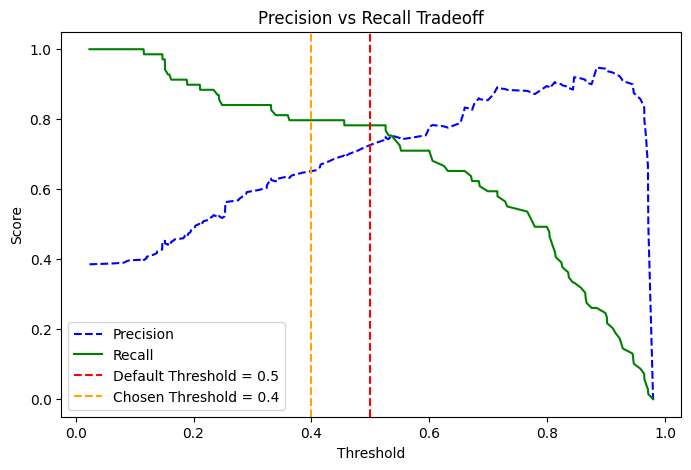

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8,5))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.axvline(x=0.5, color='r', linestyle='--', label="Default Threshold = 0.5")
plt.axvline(x=0.4, color='orange', linestyle='--', label="Chosen Threshold = 0.4")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision vs Recall Tradeoff")
plt.show()


#**COMPARISSON OF THE METHODS**


**1. Default Logistic Regression (Threshold = 0.5, No Balancing)**

- Accuracy: 0.80

- Class 0 (Did not survive): Precision = 0.81, Recall = 0.89, F1 = 0.85

- Class 1 (Survived): Precision = 0.79, Recall = 0.67, F1 = 0.72

- Observation: Model favors Class 0, recall for Class 1 is low (0.67).

**2. Balanced Logistic Regression (Class Weight = 'balanced')**

- Accuracy: 0.80

- Class 0: Precision = 0.86, Recall = 0.82, F1 = 0.84

- Class 1: Precision = 0.73, Recall = 0.78, F1 = 0.76

- Observation: Recall for Class 1 improved from 0.67 → 0.78 (better survival detection), but precision dropped slightly. Balanced overall.

**3. Custom Threshold (Threshold = 0.4)**

- Accuracy: 0.76

- Class 0: Precision = 0.85, Recall = 0.74, F1 = 0.79

- Class 1: Precision = 0.65, Recall = 0.80, F1 = 0.72

- Observation: Recall for Class 1 improved further (0.80), but accuracy fell to 0.76 and precision dropped. Good if recall is more important (e.g., not missing survivors).

**4. Precision-Recall Tradeoff (Visualization Support)**

- From the graph, lowering threshold increases recall but decreases precision.

- This is consistent with the Custom Threshold results.

#**MODEL EVALUATION**

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))



ROC-AUC Score: 0.8420948616600791


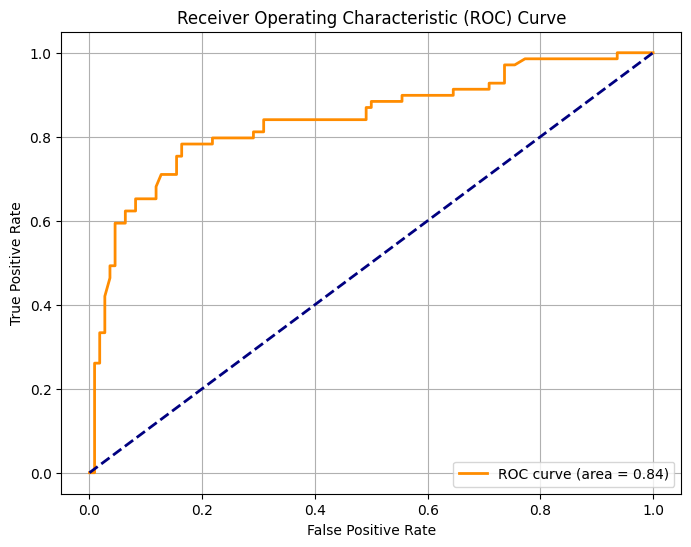

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



#**INTERPRETATION OF THE SCORE AND CURVE**

**ROC-AUC SCORE**

- 0.84 means your logistic regression model is excellent at distinguishing between the two classes—it correctly ranks positive instances higher than negative ones 84% of the time.

**Interpreting the ROC Curve Visual**

Let's decode the visual elements of your plot:
- Orange Curve: This is your model's ROC curve. The fact that it bows significantly above the diagonal line shows strong performance.
- Diagonal Dashed Line: Represents a random classifier (AUC = 0.5). Any model performing better than this line is learning something meaningful.
- Area Under the Curve (AUC): The shaded area under your curve is 0.84, confirming the model's ability to separate classes well.
- Steep Initial Rise: Indicates that the model captures a high proportion of true positives with relatively few false positives at lower thresholds—this is ideal.

In [ ]:
import pickle

In [ ]:
filename='trained_model.sav'
pickle.dump(logreg,open(filename,'wb'))

In [ ]:
#Loading the saved file
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [ ]:
import pickle

# Save the trained logistic regression model
with open("logistic_model.pkl", "wb") as file:
    pickle.dump(logreg, file)

In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 42.9 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pickle
import numpy as np

# Load the saved model
with open("logistic_model.pkl", "rb") as file:
    model = pickle.load(file)

st.title("Logistic Regression Prediction App")

# Example inputs (adjust according to your features)
input1 = st.number_input("Enter value for feature 1:")
input2 = st.number_input("Enter value for feature 2:")

if st.button("Predict"):
    features = np.array([[input1, input2]])
    prediction = model.predict(features)
    st.write("Prediction:", prediction[0])

2025-09-19 08:26:45.499 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 08:26:45.665 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-09-19 08:26:45.666 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 08:26:45.667 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 08:26:45.669 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 08:26:45.670 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 08:26:45.671 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 08:26:45.673 Thread 'MainThread': mi